# 🔎 Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

## 1. Initial Data Exploration

In [2]:
titanic_data = pd.read_csv("../data/titanic.csv")
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [4]:
print("\t\t\tSUMMARY:\n", "-" * 50)

titanic_data.info()

			SUMMARY:
 --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
print("--- Missing values in each column: ---")
titanic_data.isna().sum()

--- Missing values in each column: ---


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print(
	f"--- Percentage of missing values per column: ---\n",
	f"\n\tAge: {((177 / 891) * 100):.1f}%",
	f"\n\tCabin: {((687 / 891) * 100):.1f}%",
	f"\n\tEmbarked: {((2 / 891) * 100):.1f}%"
)

--- Percentage of missing values per column: ---
 
	Age: 19.9% 
	Cabin: 77.1% 
	Embarked: 0.2%


In [7]:
print(f"Duplicate entries: {titanic_data.duplicated().sum()}")

Duplicate entries: 0


In [8]:
print(f"--- Unique values in each column: ---")
titanic_data.nunique(dropna=True)

--- Unique values in each column: ---


PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [9]:
print(f"--- Descriptive statistics: ---")
titanic_data[['Age', 'SibSp', 'Parch', 'Fare']].describe().T

--- Descriptive statistics: ---


,count,mean,std,min,25%,50%,75%,max
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


##### 🔎 Observations: `titanic.csv`

**General Overview:**

The dataset contains **891 rows** and **12 columns**, representing passengers' data on the Titanic.

---

##### ⛑️ Data Health Check

* **Missing Values:** The `Cabin` column has the most missing values at 77.1% followed by the `Age` column at 19.9%. The `Embarked` column has the least missing values at 0.2%.
* **Data Types:** When compared with the number of unique values, `category` is the suitable data type for the `Survived`, `Pclass`, `Sex` and `Embarked` columns.

##### 📈 Statistical Insights

* **Distribution:** The `Fare` column has a significantly large disparity between the minimum (0) and maximum (~512) entries with a mean of ~32.

##### ⏭️ Immediate Next Steps

1. Drop missing values in the `Embarked` column.
2. Convert `Survived`, `Pclass`, `Sex` and `Embarked` columns to `category` data type.
3. Fill missing values in the `Age` and `Cabin` columns.

---

## 2. Handling Values

### ▶️ Immediate Next Steps


In [10]:
print("✅ Drop missing values in the 'Embarked' column.\n", "-" * 50)

titanic_data.dropna(subset=['Embarked'], inplace=True)
titanic_data.isna().sum()

✅ Drop missing values in the 'Embarked' column.
 --------------------------------------------------


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
print("✅ Convert 'Survived', 'Pclass', 'Sex' and 'Embarked' columns to categorical data types.\n", "-" * 50)

data_types = {
	'Survived': 'category',
	'Pclass': 'category',
	'Sex': 'category',
	'Embarked': 'category'
}
titanic_data = titanic_data.astype(data_types)
titanic_data.dtypes

✅ Convert 'Survived', 'Pclass', 'Sex' and 'Embarked' columns to categorical data types.
 --------------------------------------------------


PassengerId       int64
Survived       category
Pclass         category
Name             object
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [12]:
print("✅ Fill missing values in the 'Age' and 'Cabin' columns.\n", "-" * 50)

values = {
	'Age': titanic_data['Age'].mean(),
	'Cabin': "Unassigned"
}
titanic_data.fillna(value=values, inplace=True)
titanic_data.isna().sum()

✅ Fill missing values in the 'Age' and 'Cabin' columns.
 --------------------------------------------------


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
print("\t\t\tSUMMARY:\n", "-" * 50)

titanic_data.info()

print("-" * 50, "\n⚠️ Indexing inconsistent with the number of entries.")

			SUMMARY:
 --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    category
 2   Pclass       889 non-null    category
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Cabin        889 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 66.5+ KB
-------------------------------------------------- 
⚠️ Indexing inconsistent with the number of entries.


In [14]:
print("\t\t\tSUMMARY:\n", "-" * 50)

index_labels = np.arange(889)

titanic_data.index = index_labels
titanic_data.info()

print("-" * 50, "\n✅ Fix index sequence.")

			SUMMARY:
 --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 888
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    category
 2   Pclass       889 non-null    category
 3   Name         889 non-null    object  
 4   Sex          889 non-null    category
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Cabin        889 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 66.5+ KB
-------------------------------------------------- 
✅ Fix index sequence.


### 🔠 Survived

In [15]:
titanic_data['Survived'].values

[0, 1, 1, 1, 0, ..., 0, 1, 0, 1, 0]
Length: 889
Categories (2, int64): [0, 1]

In [16]:
titanic_data['Survived'] = titanic_data['Survived'].cat.rename_categories(
	{
		0: "No",
		1: "Yes"
	}
)
titanic_data['Survived'].values

['No', 'Yes', 'Yes', 'Yes', 'No', ..., 'No', 'Yes', 'No', 'Yes', 'No']
Length: 889
Categories (2, object): ['No', 'Yes']

**Status:** 🟢 Done | **Type:** `category`

##### 🕵🏽‍♀️ Observations

* Contains two categories namely `0` and `1`.

##### 🧪 Handling Logic

* Replaced the values `0` with `No` and `1` with `Yes` to clearly communicate `Survival`.

---

### 🔠 Pclass

In [17]:
titanic_data['Pclass'].values

[3, 1, 3, 1, 3, ..., 2, 1, 3, 1, 3]
Length: 889
Categories (3, int64): [1, 2, 3]

In [18]:
titanic_data['Pclass'] = titanic_data['Pclass'].cat.rename_categories(
	{
		1: "First",
		2: "Second",
		3: "Third"
	}
)

titanic_data['Pclass'].cat.reorder_categories(
	['First', 'Second', 'Third'],
	ordered=True
)

titanic_data['Pclass'].values

['Third', 'First', 'Third', 'First', 'Third', ..., 'Second', 'First', 'Third', 'First', 'Third']
Length: 889
Categories (3, object): ['First', 'Second', 'Third']

**Status:** 🟢 Done | **Type:** `category`

##### 🕵🏽‍♀️ Observations

* Contains three categories namely `1`, `2` and `3`.

##### 🧪 Handling Logic

* Replaced the values `1` with `First`, `2` with `Second` and `3` with `Third` and ordered them to clearly communicate the different tiers within `Pclass`.

---

### 🔠 Sex

In [19]:
titanic_data['Sex'].values

['male', 'female', 'female', 'female', 'male', ..., 'male', 'female', 'female', 'male', 'male']
Length: 889
Categories (2, object): ['female', 'male']

In [20]:
titanic_data['Sex'] = titanic_data['Sex'].cat.rename_categories(
	{
		'female': 'Female',
		'male': 'Male'
	}
)

titanic_data['Sex'].values

['Male', 'Female', 'Female', 'Female', 'Male', ..., 'Male', 'Female', 'Female', 'Male', 'Male']
Length: 889
Categories (2, object): ['Female', 'Male']

**Status:** 🟢 Done | **Type:** `category`

##### 🕵🏽‍♀️ Observations

* Contains two categories namely `female` and `male`.

##### 🧪 Handling Logic

* Formatted category values to title case i.e. `Female` and `Male`.

---

### 🔢 Age

In [21]:
def round_age(age):
	decimal_part = age % 1
	
	if decimal_part < 0.5:
		return int(math.floor(age))
	else:
		return int(math.ceil(age))
	
titanic_data['Age'] = titanic_data['Age'].apply(round_age).astype('int64')
titanic_data['Age'].head()


0    22
1    38
2    26
3    35
4    35
Name: Age, dtype: int64

**Status:** 🟢 Done | **Type:** `int64`

##### 🕵🏽‍♀️ Observations

* The initial data type for the `Age` column was `float64`.

##### 🧪 Handling Logic

* Age being a discrete value, round off the float values to their nearest integer and convert the data type to `int64`. Contributes to a more accurate representation of the data in the visual plots.

---

### 🔢 Fare

In [22]:
def round_fare(fare):
	decimal_part = fare % 1

	if decimal_part < 0.5:
		return int(math.floor(fare))
	else:
		return int(math.ceil(fare))
	
titanic_data['Fare'] = titanic_data['Fare'].apply(round_fare).astype('int64')
titanic_data['Fare'].head()

0     7
1    71
2     8
3    53
4     8
Name: Fare, dtype: int64

**Status:** 🟢 Done | **Type:** `int64`

##### 🕵🏽‍♀️ Observations

* The initial data type for the `Fare` column was `float64`.

##### 🧪 Handling Logic

* Round off the float values to their nearest integer and convert the data type to `int64`. Contributes to a more accurate representation of the data in the visual plots.

---

### ⚙️ Feature Engineering

#### 🔠 Age Group

In [23]:
bins = [0, 12, 19, 34, 54, 64, 120]
labels = ["0-12", "13-19", "20-34", "35-54", "55-64", "65+"]

titanic_data['Age Group'] = pd.cut(
	titanic_data['Age'],
	bins=bins,
	labels=labels
)

titanic_data['Age Group'].cat.reorder_categories(
	['0-12', '13-19', '20-34', '35-54', '55-64', '65+'],
	ordered=True
)

column_labels = ["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "Age Group", "SibSp", "Parch", "Ticket", "Fare", "Cabin", "Embarked"]

titanic_data = titanic_data.reindex(columns=column_labels)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Age Group,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,Third,"Braund, Mr. Owen Harris",Male,22,20-34,1,0,A/5 21171,7,Unassigned,S
1,2,Yes,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38,35-54,1,0,PC 17599,71,C85,C
2,3,Yes,Third,"Heikkinen, Miss Laina",Female,26,20-34,0,0,STON/O2. 3101282,8,Unassigned,S
3,4,Yes,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35,35-54,1,0,113803,53,C123,S
4,5,No,Third,"Allen, Mr. William Henry",Male,35,35-54,0,0,373450,8,Unassigned,S


**Type:** `category` | **Derived From:** `Age`

##### 🧠 Logic & Reasoning

Created age bins to represent the age groups as is standard practice with data presentation of age demographics.

	* **0-12:** Child
	* **13-19:** Teenager
	* **20-34:** Young adult
	* **35-54:** Middle aged
	* **55-64:** Pre-retirement
	* **65+:** Senior

---

#### 🔠 Accompanied

In [24]:
titanic_data['Accompanied'] = np.where(
	(titanic_data['SibSp'] + titanic_data['Parch']) > 0,
	"Yes",
	"No"
)
titanic_data['Accompanied'] = titanic_data['Accompanied'].astype('category')

column_labels = ["PassengerId", "Survived", "Pclass", "Name", "Sex", "Age", "Age Group", "SibSp", "Parch", "Accompanied", "Ticket", "Fare", "Cabin", "Embarked"]

titanic_data = titanic_data.reindex(columns=column_labels)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Age Group,SibSp,Parch,Accompanied,Ticket,Fare,Cabin,Embarked
0,1,No,Third,"Braund, Mr. Owen Harris",Male,22,20-34,1,0,Yes,A/5 21171,7,Unassigned,S
1,2,Yes,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38,35-54,1,0,Yes,PC 17599,71,C85,C
2,3,Yes,Third,"Heikkinen, Miss Laina",Female,26,20-34,0,0,No,STON/O2. 3101282,8,Unassigned,S
3,4,Yes,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35,35-54,1,0,Yes,113803,53,C123,S
4,5,No,Third,"Allen, Mr. William Henry",Male,35,35-54,0,0,No,373450,8,Unassigned,S


**Type:** `category` | **Derived From:** `SibSp` & `Parch`

##### 🧠 Logic & Reasoning

Created a binary indicator to simplify the family dynamic.

	* **Yes:** Passenger had 1+ sibling, spouse, parent or child aboard.
	* **No:** Passenger was travelling without immediate family.

> **Note:** This feature helps test the "Women and Children First" hypothesis, as accompanied passengers might have prioritized the safety of others or recieved help themselves.

---

##### 🔠 Cabin Assignment

In [25]:
titanic_data['Cabin Assignment'] = titanic_data['Cabin'].copy()

column_labels.insert(column_labels.index("Cabin") + 1, "Cabin Assignment")
titanic_data = titanic_data.reindex(columns=column_labels)

In [26]:
titanic_data['Cabin Assignment'] = np.where(
	titanic_data['Cabin Assignment'] != "Unassigned",
	"Assigned",
	"Unassigned"
)
titanic_data['Cabin Assignment'] = titanic_data['Cabin Assignment'].astype('category')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Age Group,SibSp,Parch,Accompanied,Ticket,Fare,Cabin,Cabin Assignment,Embarked
0,1,No,Third,"Braund, Mr. Owen Harris",Male,22,20-34,1,0,Yes,A/5 21171,7,Unassigned,Unassigned,S
1,2,Yes,First,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Female,38,35-54,1,0,Yes,PC 17599,71,C85,Assigned,C
2,3,Yes,Third,"Heikkinen, Miss Laina",Female,26,20-34,0,0,No,STON/O2. 3101282,8,Unassigned,Unassigned,S
3,4,Yes,First,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Female,35,35-54,1,0,Yes,113803,53,C123,Assigned,S
4,5,No,Third,"Allen, Mr. William Henry",Male,35,35-54,0,0,No,373450,8,Unassigned,Unassigned,S


## 3. Univariate Analysis

### 🔠 Categorical Variables

#### 📊 Survival Counts

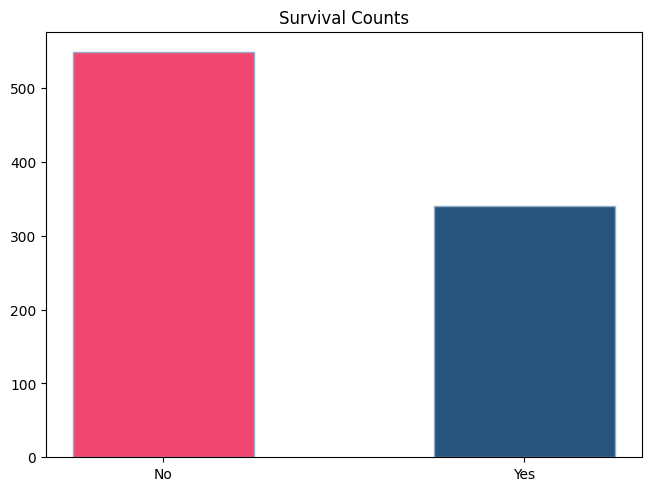

-------------------------------------------------- 
Survival Rate: ~38.2% 
Mortality Rate: ~61.8%


In [27]:
colours = {
	"dusk blue": "#26547C",
	"bubblegum pink": "#EF476F",
	"golden pollen": "#FFD166",
	"powder blue": "#96ADC8"
}

fig, ax = plt.subplots(layout='constrained')

ax.set_title("Survival Counts")
ax.bar(
	titanic_data['Survived'].value_counts().index,
	titanic_data['Survived'].value_counts().values,
	width=0.5,
	color=[colours["bubblegum pink"], colours["dusk blue"]],
	edgecolor=colours["powder blue"]
)

plt.show()

print(
	"-" * 50,
	f"\nSurvival Rate: ~{((titanic_data['Survived'].value_counts().values[1] / titanic_data['Survived'].size) * 100):.1f}%",
	f"\nMortality Rate: ~{((titanic_data['Survived'].value_counts().values[0] / titanic_data['Survived'].size) * 100):.1f}%"
)

##### 🕵🏽‍♀️ Observation

The dataset is imbalanced. More passengers perished than survived.

> **Insight:** This baseline is crucial. Any feature we analyze (like `Sex` or `Accompanied`) needs to significantly shift these percentages to be considered a strong predictor.

---

#### 📊 Passenger Class 

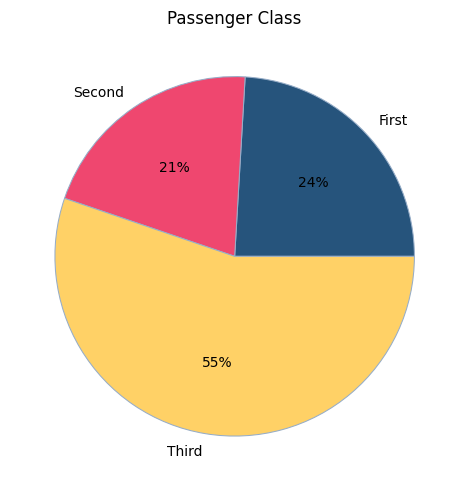

In [28]:
fig, ax = plt.subplots(layout='constrained')

ax.set_title("Passenger Class")
ax.pie(
	titanic_data['Pclass'].value_counts().sort_index().values,
	labels=titanic_data['Pclass'].value_counts().sort_index().index,
	colors=[colours["dusk blue"], colours["bubblegum pink"], colours["golden pollen"]],
	wedgeprops={'linewidth': 0.75, 'edgecolor': colours["powder blue"]},
	autopct='%1.0f%%'
)

plt.show()

##### 🕵🏽‍♀️ Observation

Third class had the highest number of passengers, followed by second class and finally first class which had the lowest number of passengers.

> **Insight:** This could be an indicator of income among the passengers and the capacity across the three passenger classes.

---

#### 📊 Sex

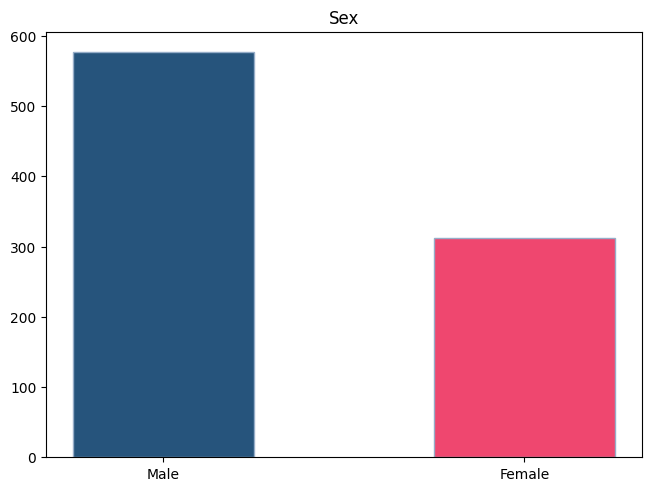

In [29]:
fig, ax = plt.subplots(layout='constrained')

ax.set_title("Sex")
ax.bar(
	titanic_data['Sex'].value_counts().index,
	titanic_data['Sex'].value_counts().values,
	width=0.5,
	color=[colours["dusk blue"], colours["bubblegum pink"]],
	edgecolor=colours["powder blue"]
)

plt.show()

##### 🕵🏽‍♀️ Observation

There were more male passengers than female passengers on board.

> **Insight:** This is an indicator that there is a high probability that features are skewed towards the male population.

---

#### 📊 Age Group

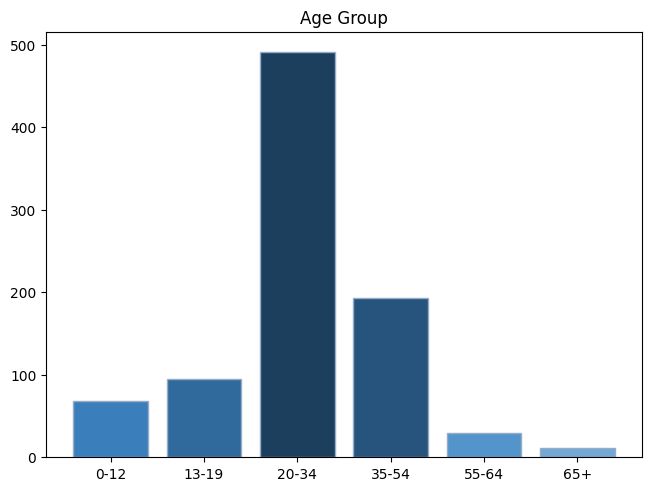

In [30]:
colours_monochrome = {
	"yale blue": "#1D3F5E",
	"dusk blue": "#26547C",
	"baltic blue": "#306A9C",
	"steel blue": "#3A7FBB",
	"blue bell": "#5395CA",
	"cool horizon": "#72A8D5"
}

fig, ax = plt.subplots(layout='constrained')

ax.set_title("Age Group")
ax.bar(
	titanic_data['Age Group'].value_counts().sort_index().index,
	titanic_data['Age Group'].value_counts().sort_index().values,
	color=[
		colours_monochrome["steel blue"],
		colours_monochrome["baltic blue"],
		colours_monochrome["yale blue"],
		colours_monochrome["dusk blue"],
		colours_monochrome["blue bell"],
		colours_monochrome["cool horizon"]
	],
	edgecolor=colours["powder blue"]
)

plt.show()

#### 📊 Accompanied

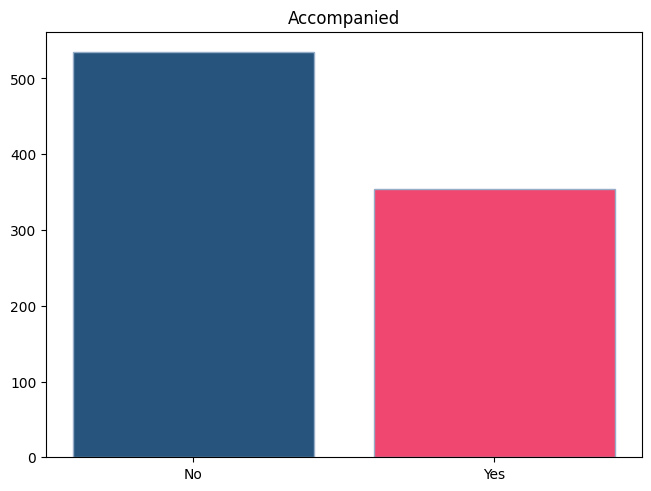

In [31]:
fig, ax = plt.subplots(layout='constrained')

ax.set_title("Accompanied")
ax.bar(
	titanic_data['Accompanied'].value_counts().index,
	titanic_data['Accompanied'].value_counts().values,
	color=[colours["dusk blue"], colours["bubblegum pink"]],
	edgecolor=colours["powder blue"]
)

plt.show()

#### 📊 Cabin Assignment

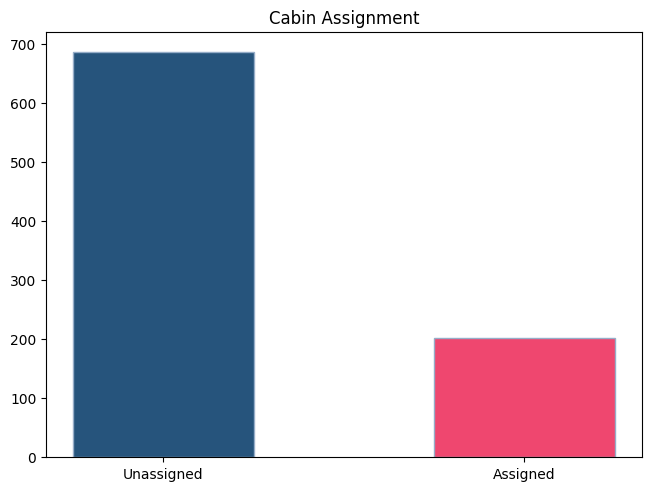

In [32]:
fig, ax = plt.subplots(layout='constrained')

ax.set_title("Cabin Assignment")
ax.bar(
	titanic_data['Cabin Assignment'].value_counts().index,
	titanic_data['Cabin Assignment'].value_counts().values,
	width=0.5,
	color=[colours["dusk blue"], colours["bubblegum pink"]],
	edgecolor=colours["powder blue"]
)

plt.show()

#### 📊 Location Embarked

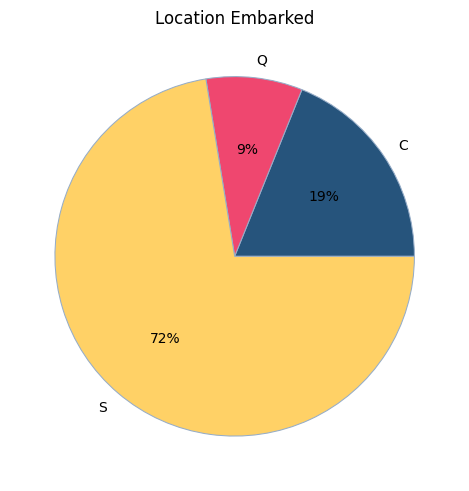

In [33]:
fig, ax = plt.subplots(layout='constrained')

ax.set_title("Location Embarked")
ax.pie(
	titanic_data['Embarked'].value_counts().sort_index().values,
	labels=titanic_data['Embarked'].value_counts().sort_index().index,
	colors=[colours["dusk blue"], colours["bubblegum pink"], colours["golden pollen"]],
	wedgeprops={'linewidth': 0.75, 'edgecolor': colours["powder blue"]},
	autopct='%1.0f%%'
)

plt.show()

### 🔢 Numerical Data

#### 📊 Age

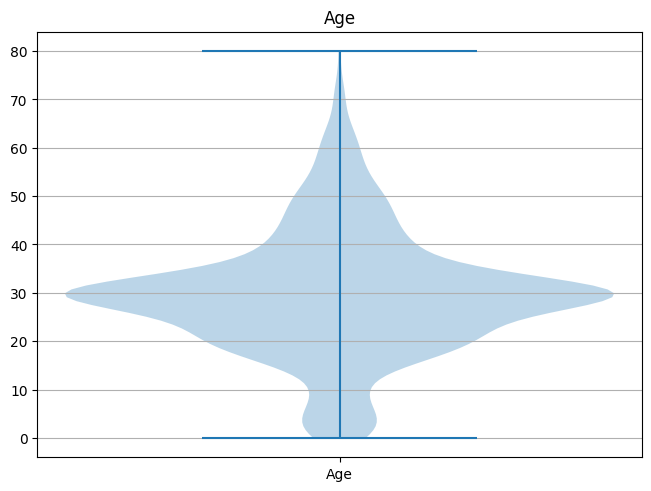

In [34]:
fig, ax = plt.subplots(layout='constrained')

ax.set_title("Age")
ax.violinplot(
	titanic_data['Age']
)
ax.yaxis.grid(True)
ax.set_xticks([1], labels=['Age'])

plt.show()

#### 📊 Sibling/Spouse

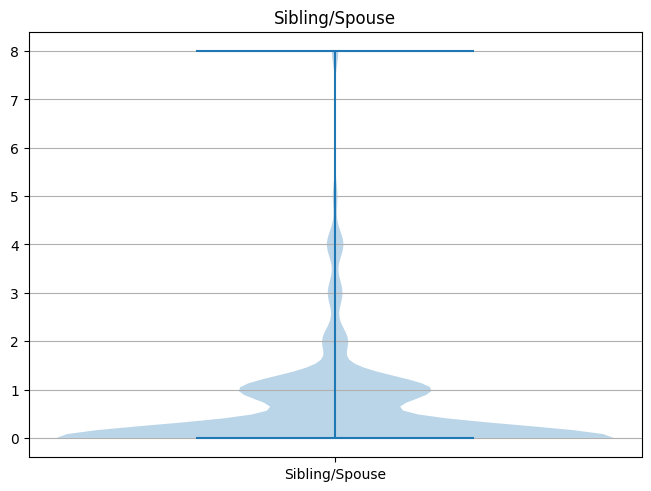

In [35]:
fig, ax = plt.subplots(layout='constrained')

ax.set_title("Sibling/Spouse")
ax.violinplot(
	titanic_data['SibSp']
)
ax.yaxis.grid(True)
ax.set_xticks([1], labels=['Sibling/Spouse'])

plt.show()

#### 📊 Parent/Child(ren)

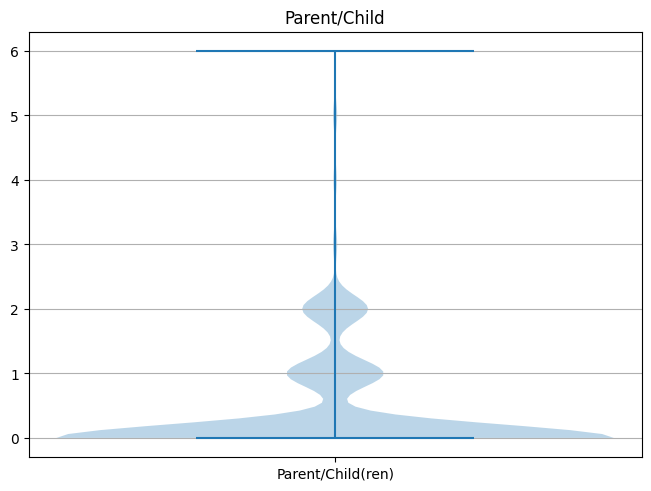

In [36]:
fig, ax = plt.subplots(layout='constrained')

ax.set_title("Parent/Child")
ax.violinplot(
	titanic_data['Parch']
)
ax.yaxis.grid(True)
ax.set_xticks([1], labels=['Parent/Child(ren)'])

plt.show()

#### 📊 Fare

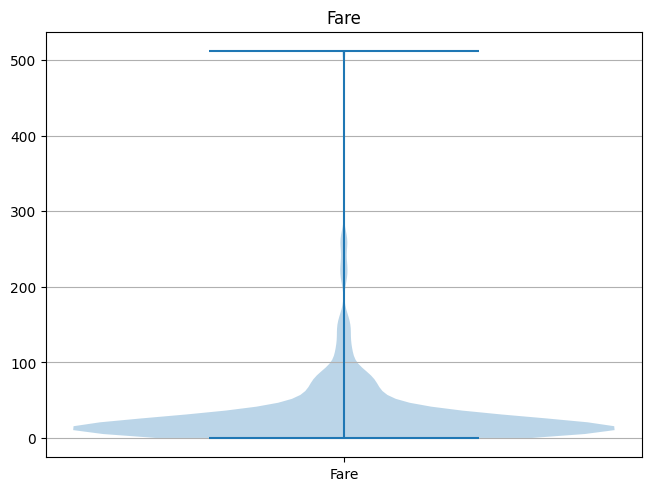

In [37]:
fig, ax = plt.subplots(layout='constrained')

ax.set_title("Fare")
ax.violinplot(
	titanic_data['Fare']
)
ax.yaxis.grid(True)
ax.set_xticks([1], labels=['Fare'])

plt.show()


---

## 4. Bivariate Analysis

### 🔠 Pclass vs. 🔠 Survived

In [38]:
pclass_survived = titanic_data[['Pclass', 'Survived']].value_counts().sort_index(level=0)
pclass_survived = pclass_survived.unstack()
pclass_survived

Survived,No,Yes
Pclass,,
First,80,134
Second,97,87
Third,372,119


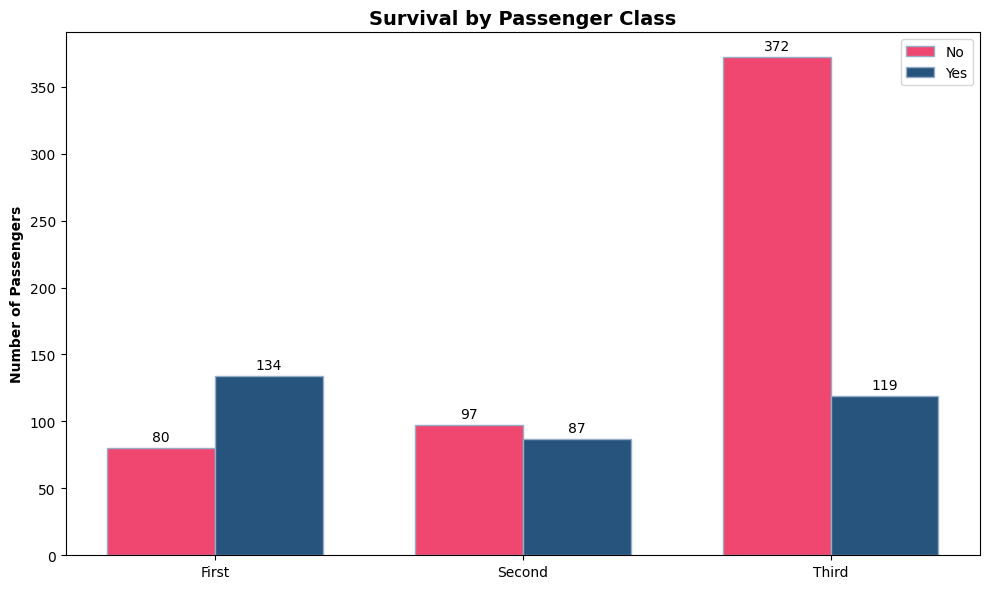

In [39]:
labels = pclass_survived.index
survived_no = pclass_survived['No']
survived_yes = pclass_survived['Yes']

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bar_no = ax.bar(
	x - (width / 2),
	survived_no,
	width,
	color=colours["bubblegum pink"],
	label="No",
	edgecolor=colours["powder blue"]
)

bar_yes = ax.bar(
	x + (width / 2),
	survived_yes,
	width,
	color=colours["dusk blue"],
	label="Yes",
	edgecolor=colours["powder blue"]
)

ax.set_ylabel("Number of Passengers", fontweight='bold')
ax.set_title("Survival by Passenger Class", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels),
ax.legend()

ax.bar_label(bar_no, padding=3)
ax.bar_label(bar_yes, padding=3)

fig.tight_layout()
plt.show()

#### 📊 Visualization: Survival by Class (`Pclass`)

##### 🕵🏽‍♀️ Observation

A clear socio-economic trend is visible in the survival rates.

* **First Class:** The only class where the majority of passengers survived.
* **Third Class:** The vast majority of passengers perished, representing the highest loss of life.

> **Key Insight:** `Pclass` is likely a very high-importance feature for a predictive model using this dataset. It acts as a proxy for both cabin location (proximity to lifeboats) and socio-economic priority during evacuation.

##### 🧠 Matplotlib Implementation: Grouped Bar Chart

---

### 🔠 Sex vs. 🔠 Age Group

In [59]:
sex_age_group = titanic_data[['Sex', 'Age Group']].value_counts()
sex_age_group = sex_age_group.unstack().fillna(0)
sex_age_group

Age Group,0-12,13-19,20-34,35-54,55-64,65+
Sex,,,,,,
Female,32.0,43.0,158.0,70.0,9.0,0.0
Male,36.0,52.0,333.0,123.0,21.0,11.0


In [61]:
sex_age_group = sex_age_group.astype({
	'0-12': 'int64',
	'13-19': 'int64',
	'20-34': 'int64',
	'35-54': 'int64',
	'55-64': 'int64',
	'65+': 'int64'
})
sex_age_group

Age Group,0-12,13-19,20-34,35-54,55-64,65+
Sex,,,,,,
Female,32,43,158,70,9,0
Male,36,52,333,123,21,11


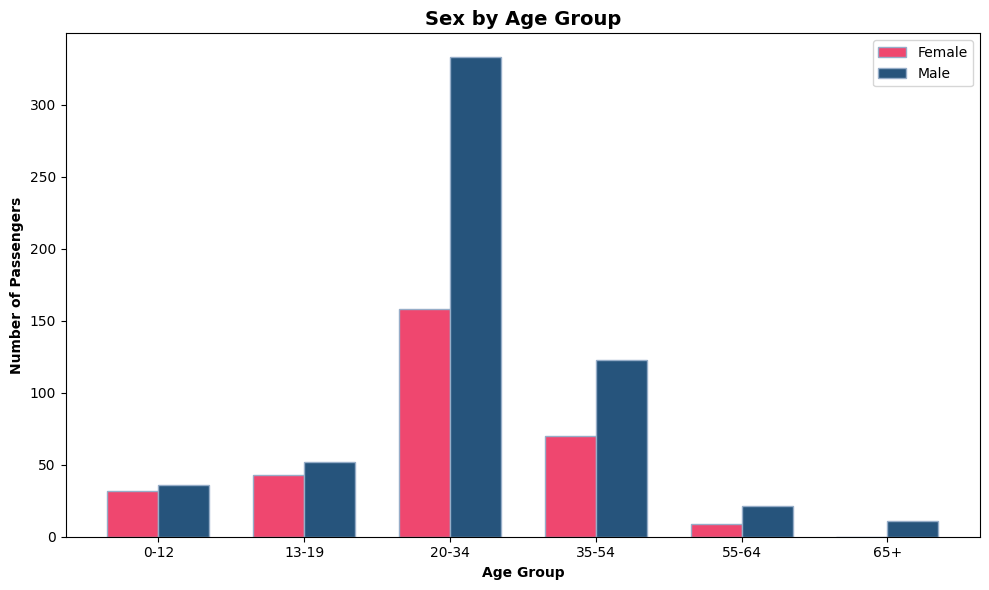

In [172]:
labels = sex_age_group.columns

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(
	labels,
	sex_age_group.loc['Female'].values,
	width=-0.35,
	align='edge',
	color=colours["bubblegum pink"],
	edgecolor=colours["powder blue"],
	label="Female"
)

ax.bar(
	labels,
	sex_age_group.loc['Male'].values,
	width=0.35,
	align="edge",
	color=colours["dusk blue"],
	edgecolor=colours["powder blue"],
	label="Male"
)

ax.set_ylabel("Number of Passengers", fontweight='bold')
ax.set_xlabel("Age Group", fontweight='bold')
ax.set_title("Sex by Age Group", fontsize=14, fontweight='bold')
ax.legend()

fig.tight_layout()
plt.show()


---

### 🔠 Age Group vs. 🔠 Accompanied

In [150]:
age_group_accompanied = titanic_data[['Age Group', 'Accompanied']].value_counts()
age_group_accompanied = age_group_accompanied.unstack()
age_group_accompanied

Accompanied,No,Yes
Age Group,,
0-12,2,66
13-19,52,43
20-34,345,146
35-54,105,88
55-64,22,8
65+,9,2


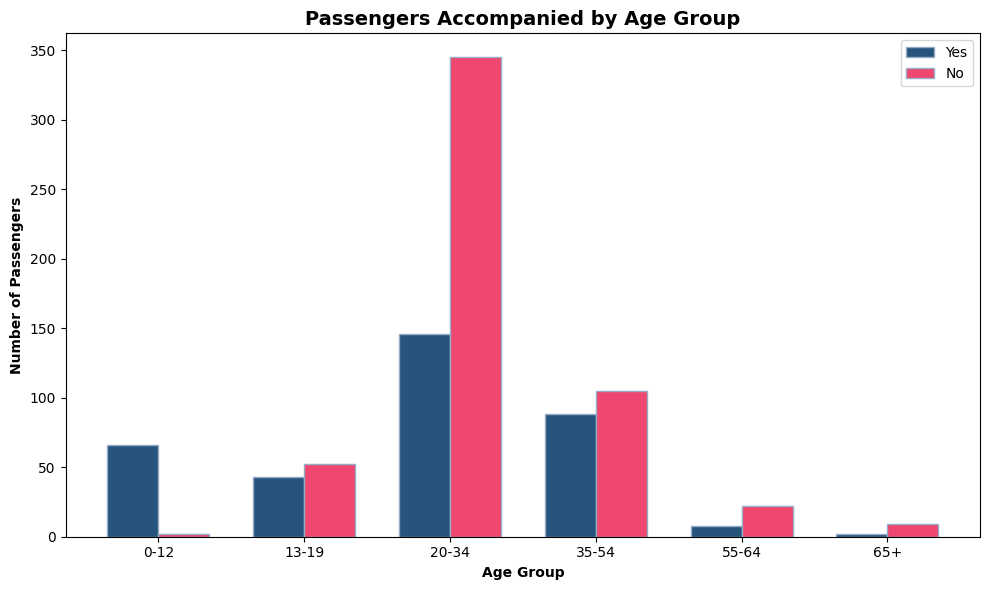

In [187]:
labels = age_group_accompanied.index

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(
	labels,
	age_group_accompanied['Yes'],
	width=-0.35,
	align='edge',
	color=colours["dusk blue"],
	edgecolor=colours["powder blue"],
	label="Yes"
)

ax.bar(
	labels,
	age_group_accompanied['No'],
	width=0.35,
	align='edge',
	color=colours["bubblegum pink"],
	edgecolor=colours["powder blue"],
	label="No"
)

ax.set_ylabel("Number of Passengers", fontweight='bold')
ax.set_xlabel("Age Group", fontweight='bold')
ax.set_title("Passengers Accompanied by Age Group", fontsize=14, fontweight='bold')
ax.legend()

fig.tight_layout()
plt.show()


---

### 🔠 Cabin Assignment vs 🔢 Embarked

In [273]:
cabin_assignment_embarked = titanic_data[['Cabin Assignment', 'Embarked']].value_counts().unstack()
cabin_assignment_embarked

Embarked,C,Q,S
Cabin Assignment,,,
Assigned,69,4,129
Unassigned,99,73,515


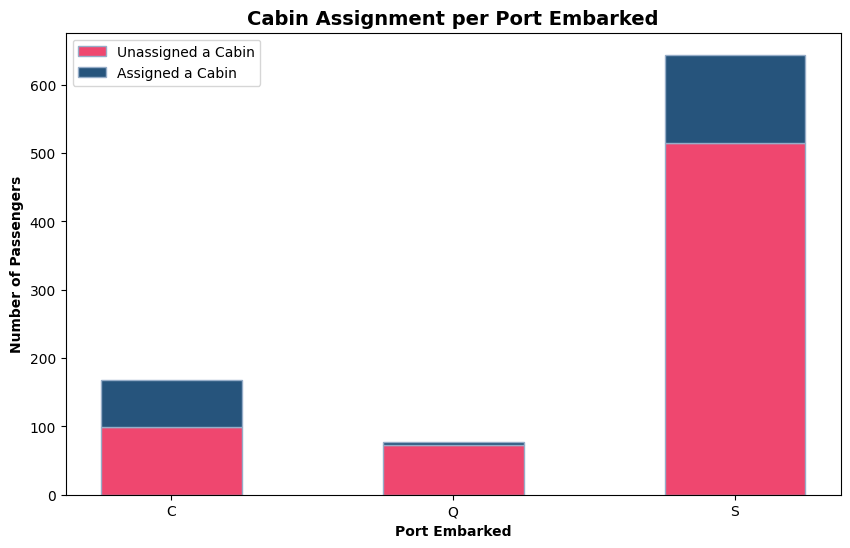

In [299]:
labels = cabin_assignment_embarked.columns

fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(
  labels,
  cabin_assignment_embarked.loc['Unassigned'].values,
  width=0.5,
  color=colours["bubblegum pink"],
  edgecolor=colours["powder blue"],
  label="Unassigned a Cabin"
)

ax.bar(
  labels,
  cabin_assignment_embarked.loc['Assigned'].values,
  bottom=cabin_assignment_embarked.loc['Unassigned'],
  width=0.5,
  color=colours["dusk blue"],
  edgecolor=colours["powder blue"],
  label="Assigned a Cabin"
)

ax.set_ylabel("Number of Passengers", fontweight='bold')
ax.set_xlabel("Port Embarked", fontweight='bold')
ax.set_title("Cabin Assignment per Port Embarked", fontsize=14, fontweight='bold')
ax.legend()

plt.show()


---

## 5. Multivariate Analysis

### 🔢 Age vs. 🔢 Fare vs. 🔠 Embarked

In [195]:
age_fare_embarked = titanic_data[['Age', 'Fare', 'Embarked']]
age_fare_embarked.head()

,Age,Fare,Embarked
0,22,7,S
1,38,71,C
2,26,8,S
3,35,53,S
4,35,8,S


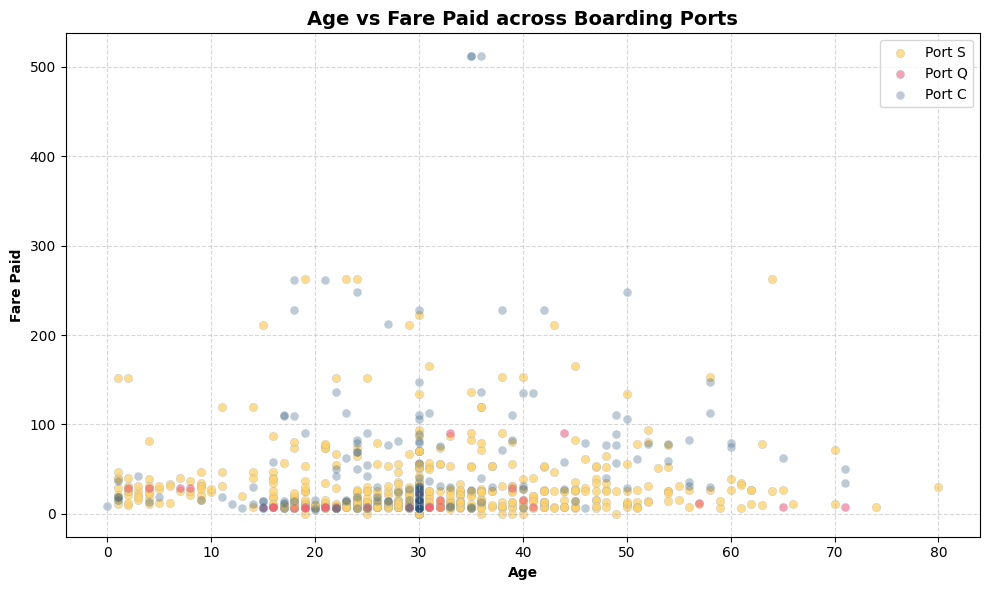

In [268]:
port_S = age_fare_embarked[age_fare_embarked['Embarked'] == 'S']
port_Q = age_fare_embarked[age_fare_embarked['Embarked'] == 'Q']
port_C = age_fare_embarked[age_fare_embarked['Embarked'] == 'C']

fig, ax = plt.subplots(figsize=(10, 6))

ax.scatter(
  port_S['Age'],
  port_S['Fare'],
  c=colours["golden pollen"],
  alpha=0.75,
  edgecolors=colours["powder blue"],
  linewidths=0.25,
  label="Port S"
)

ax.scatter(
  port_Q['Age'],
  port_Q['Fare'],
  c=colours["bubblegum pink"],
  alpha=0.5,
  edgecolors=colours["powder blue"],
  linewidths=0.25,
  label="Port Q"
)

ax.scatter(
  port_C['Age'],
  port_C['Fare'],
  c=colours["dusk blue"],
  alpha=0.3,
  edgecolors=colours["powder blue"],
  linewidths=0.25,
  label="Port C"
)

ax.set_ylabel("Fare Paid", fontweight='bold')
ax.set_xlabel("Age", fontweight='bold')
ax.set_title("Age vs Fare Paid across Boarding Ports", fontsize=14, fontweight='bold')
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

fig.tight_layout()
plt.show()